In [1]:
import os

import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import pickle

In [2]:
if not os.path.exists('heart.csv'):
    responce = requests.get('https://raw.githubusercontent.com/rashida048/Datasets/master/Heart.csv')
    assert responce.ok, 'Cannot download file'
    with open('heart.csv', 'wb') as fout:
        fout.write(responce.content)
        print('Dataset download')

df = pd.read_csv('heart.csv', index_col=0)
df[df.isna().any(1)].head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
88,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
193,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
267,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes
288,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No


In [7]:
df.columns, len(df.columns)

(Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
        'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
       dtype='object'), 14)

# Посмотрим на данные

In [4]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [6]:
pd.read_csv?

In [5]:
catecorical_features = ['Sex', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'ChestPain', 'Ca', 'Thal']
print(df[catecorical_features].isna().sum())
df[catecorical_features].apply(lambda x: x.unique().tolist())

Sex          0
Fbs          0
RestECG      0
ExAng        0
Slope        0
ChestPain    0
Ca           4
Thal         2
dtype: int64


Sex                                                   [1, 0]
Fbs                                                   [1, 0]
RestECG                                            [2, 0, 1]
ExAng                                                 [0, 1]
Slope                                              [3, 2, 1]
ChestPain    [typical, asymptomatic, nonanginal, nontypical]
Ca                                 [0.0, 3.0, 2.0, 1.0, nan]
Thal                        [fixed, normal, reversable, nan]
dtype: object

In [7]:
integer_featuers = ['Age', 'RestBP', 'Chol', 'MaxHR','Oldpeak']
print(df[integer_featuers].isna().sum())
df[integer_featuers].apply(lambda x: x.unique().tolist())

Age        0
RestBP     0
Chol       0
MaxHR      0
Oldpeak    0
dtype: int64


Age        [63.0, 67.0, 37.0, 41.0, 56.0, 62.0, 57.0, 53....
RestBP     [145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150...
Chol       [233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268...
MaxHR      [150.0, 108.0, 129.0, 187.0, 172.0, 178.0, 160...
Oldpeak    [2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, ...
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


No     164
Yes    139
Name: AHD, dtype: int64


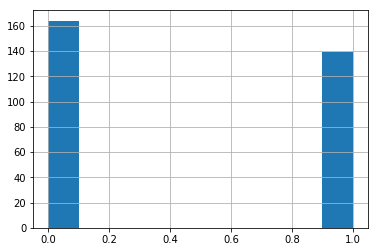

In [10]:
# Посмотрим сбалансированность классов
print(df.AHD.value_counts())
df.AHD.apply(lambda x: 1 if x == 'Yes' else 0).hist();

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,target
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.223120
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.276816
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.150825
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.085164
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.025264
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.169202
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.417167
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.431894
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.424510
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110119,0.339213


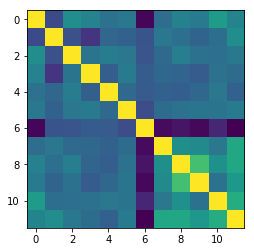

In [11]:
df['target'] = df.AHD.apply(lambda x: 1 if x == 'Yes' else 0)
plt.imshow(df.corr())
df.corr()#.apply(lambda x: x[abs(x) > 0.4])

# Разделим данные

In [12]:
test_size = 0.2
random_seed = 42
train, test = train_test_split(df, test_size=test_size, random_state=random_seed)

In [13]:
print(train.AHD.value_counts())
print(test.AHD.value_counts())

No     135
Yes    107
Name: AHD, dtype: int64
Yes    32
No     29
Name: AHD, dtype: int64


# Создадим трансформеры и пайплайны

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [15]:
int_scaler = StandardScaler().fit(df[integer_featuers])

In [16]:
with open('int_scaler', 'wb') as fout:
    pickle.dump(int_scaler, fout)

with open('int_scaler', 'rb') as fin:
    load_int_scaler = pickle.load(fin)

np.allclose(int_scaler.transform(df[integer_featuers]), 
             load_int_scaler.transform(df[integer_featuers]))

True

In [17]:
OneHotEncoder(sparse=False, drop='if_binary').fit_transform(df[catecorical_features[:1] + integer_featuers])

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [30]:
int_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('scale', StandardScaler())
])
cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, drop='if_binary', handle_unknown='ignore'))
])
# int_transformer.fit_transform(df[integer_featuers])
# cat_transformer.fit_transform(df[catecorical_features])
transformer = ColumnTransformer([
    ('integer', int_pipe, integer_featuers),
    ('categorical', cat_pipe, catecorical_features)
])
transformer.fit_transform(df)

array([ 0.94872647,  0.75752504, -0.2649003 ,  0.01719733,  1.08733806,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

In [34]:
transformer.fit(train)
X_train, y_train = transformer.transform(train), train.AHD.apply(lambda x: 1 if x == 'Yes' else 0)
X_test, y_test = transformer.transform(test), test.AHD.apply(lambda x: 1 if x == 'Yes' else 0)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, r2_score
model = LogisticRegression().fit(X_train, y_train)
preds = model.predict(X_test)
for name, mectric_fn in [('accuracy', accuracy_score), ('roc_auc', roc_auc_score), ('r2', r2_score)]:
    print(name, round(mectric_fn(preds, y_test), 4), sep=': ')

accuracy: 0.8525
roc_auc: 0.8528
r2: 0.4058
